* Aşağıdaki kod kırmızı ile uyarı yazılarını göstermemeye yarıyor.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Basit Doğrusal Regresyon

* Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

- Modellemek, çeşitli kavramlar arasındaki ilişkileri belirli matematiksel formlarda ifade etmek demektir.

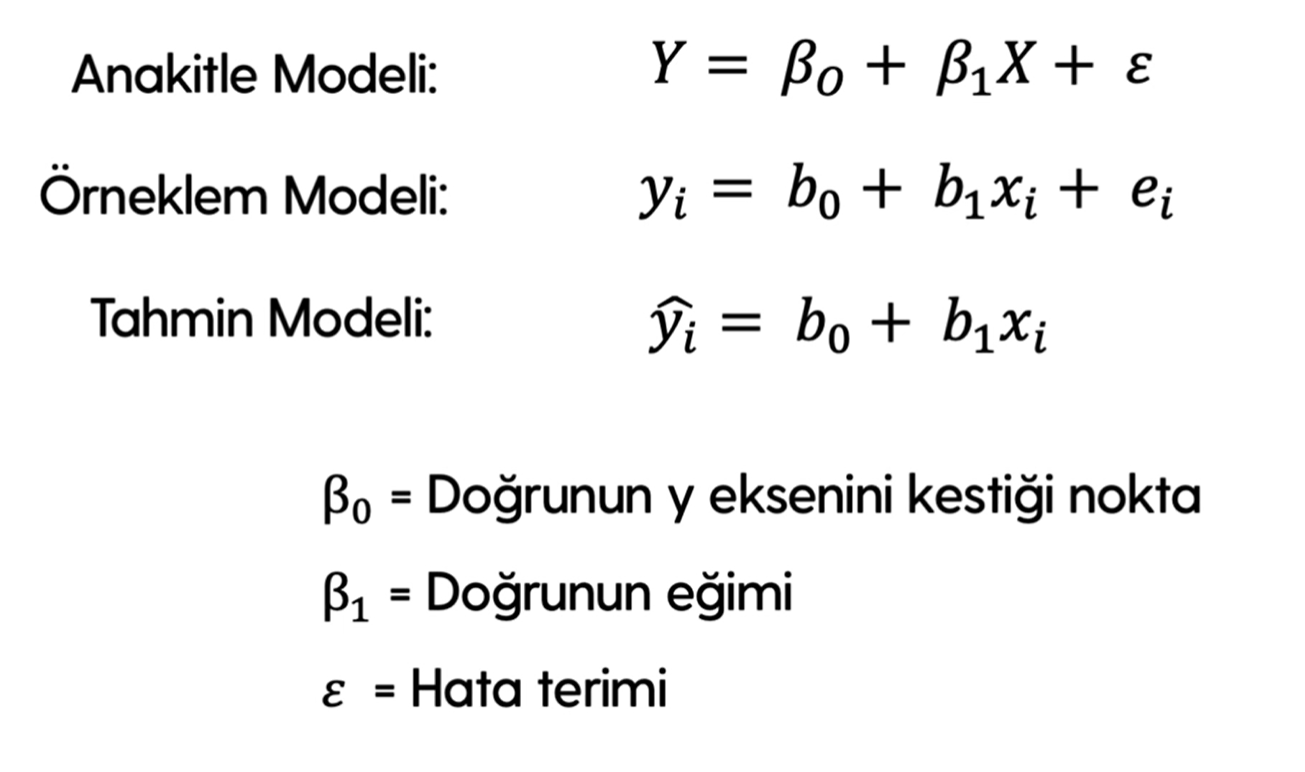
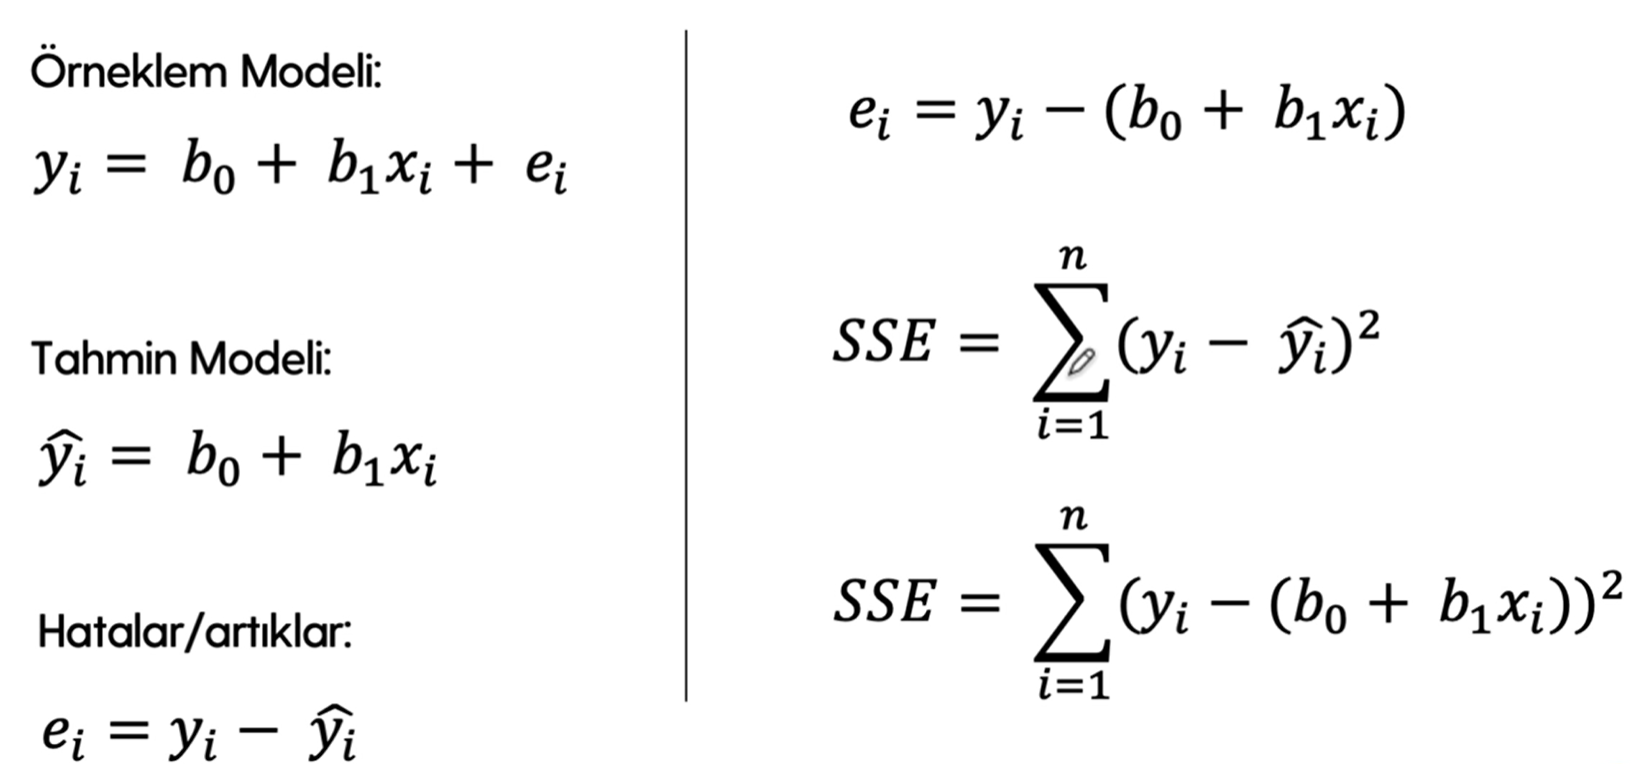
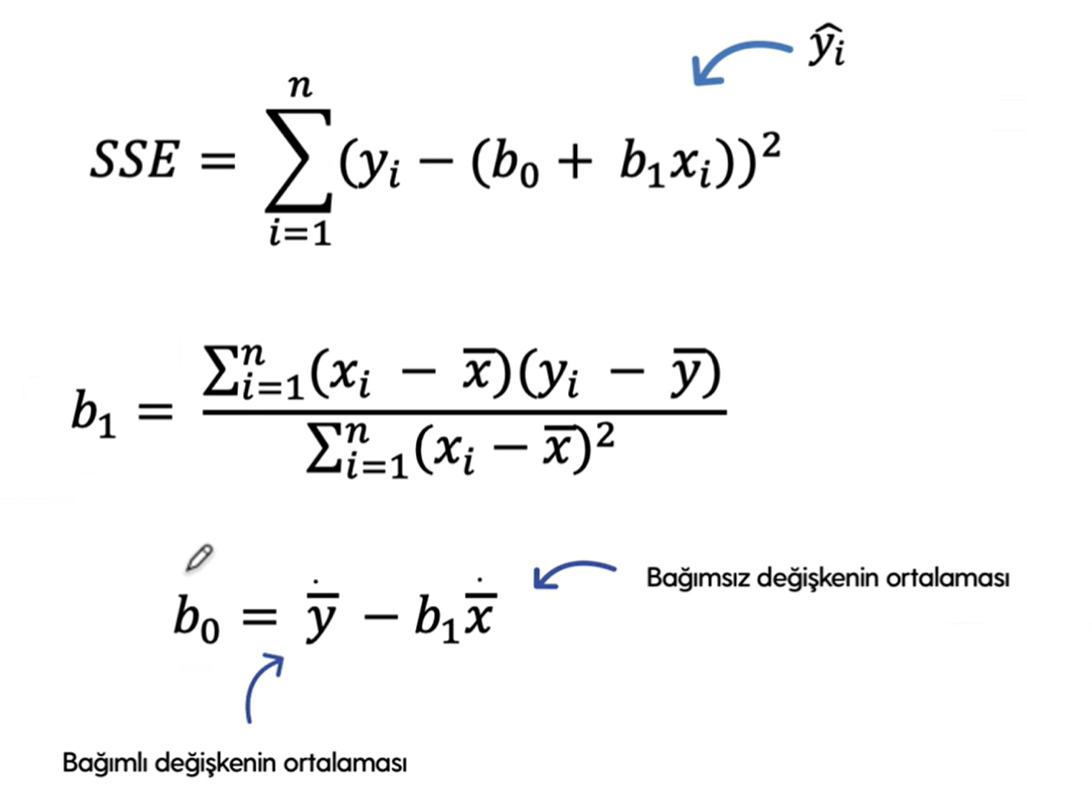
### Tahmin Modeli
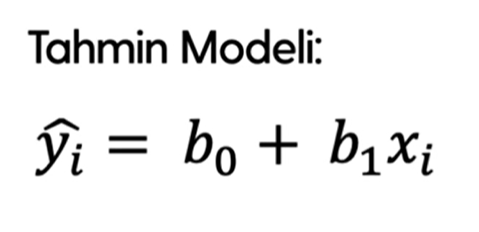

### Geometrik Gösterim
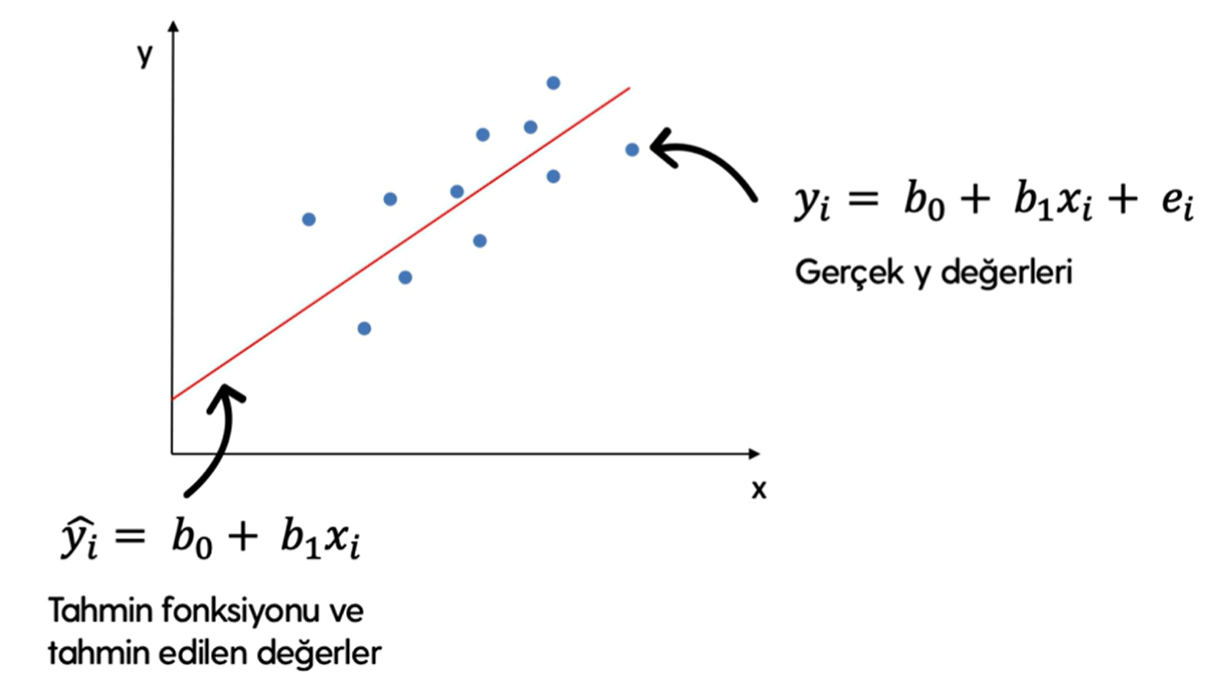

### Basit Doğrusal Regresyon Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# İlk sütundaki "Unnamed" kısmını kaldırmak için aşağıdaki kodu kullanabiliriz.
df = pd.read_csv("Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
import seaborn as sns

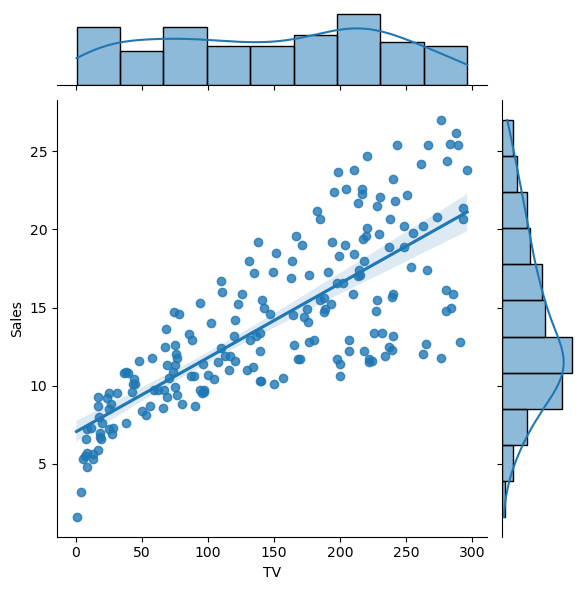

In [7]:
sns.jointplot(x = "TV", y = "Sales", data = df, kind = "reg");

# Aşağıdaki çıktıda TV satışları arttıkça satışlarında arttığını görüyoruz. Ve aralarında doğrusal ve pozitif bir ilişki görüyoruz.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df[["TV"]]   # x burada bağımsız değişken

In [10]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
y = df[["Sales"]]   # y burada bağımlı değişken

In [12]:
reg = LinearRegression()  # Burada model nesnesi oluşturduk

In [13]:
model = reg.fit(X, y)     # Burda model fit ettik yani kurduk.

In [14]:
model

LinearRegression()

In [15]:
str(model)

'LinearRegression()'

In [16]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

* Yukarıdaki 'coef_' = Modele ait kat sayı,
* 'intercept_' = Sabitimiz,

In [17]:
model.intercept_       # Beta0 kat sayısı

array([7.03259355])

In [18]:
model.coef_           # Beta1 kat sayısı

array([[0.04753664]])

In [19]:
# r² (rkare) = Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.
model.score(X, y)

0.611875050850071

### Basit Doğrusal Regresyon Modelin Tahmini

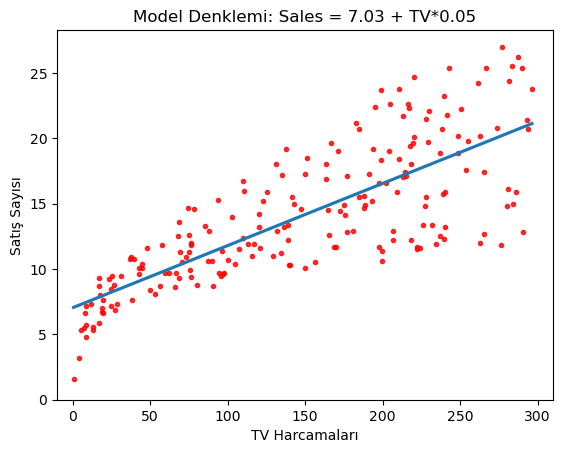

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(x = df["TV"], y = df["Sales"], ci = None, scatter_kws = {'color': 'r', 's': 9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0);

* x=df["TV"]: x ekseni için kullanmak istediğimiz veriyi belirler. Burada df["TV"], veri çerçevesinde "TV" sütununa karşılık gelir.
* İşlevi: Grafikte yatay eksende gösterilecek değişkeni tanımlar. Bu durumda, "TV harcamaları" yatay eksende gösterilecektir.
* y=df["Sales"]: y ekseni için kullanmak istediğimiz veriyi belirler. Burada df["Sales"], veri çerçevesinde "Sales" sütununa karşılık gelir.
* İşlevi: Grafikte dikey eksende gösterilecek değişkeni tanımlar. Bu durumda, "Satış sayısı" dikey eksende gösterilecektir.
* ci=None: ci, regresyon çizgisi etrafındaki güven aralığını temsil eder. Burada "confidence interval" anlamına gelir.
* İşlevi: Bu argüman regresyon çizgisi etrafında istatistiksel bir güven aralığı çizilip çizilmeyeceğini belirler. ci=None kullanıldığında, güven aralığı çizilmez. Varsayılan olarak, Seaborn %95'lik bir güven aralığı çizer, ancak burada None seçildiği için güven aralığı gösterilmez.
* scatter_kws={'color': 'r', 's': 9}: scatter_kws, veri noktalarının (scatter plot) stilini ayarlamak için kullanılan bir sözlüktür. "scatter_kws" açılımı "scatter keyword arguments" anlamına gelir.
* İşlevi: 'color': 'r': Veri noktalarının rengini kırmızı ('r') yapar. Bu, scatter plot üzerindeki noktaların kırmızı renkte görünmesini sağlar. 's': 9: Scatter plot üzerindeki veri noktalarının boyutunu ayarlar. Burada s=9, veri noktalarının boyutunu 9 birim yapar (standart birim).

In [21]:
model.predict([[165]])

array([[14.87613922]])

* Yukarıda direk model içerisinden predict ile tahmin yapmaya çalışırsak uyarı ile karşılaşıyoruz. Bu uyarıyı verme nedeni, LinearRegression modelinin eğitilirken (fit edilirken) özellik adları (feature names) içeren bir veri çerçevesi (örneğin pandas DataFrame) ile eğitilmiş olması, ancak predict işlemi yapılırken girdi olarak doğrudan bir liste ([[165]]) verilmesidir. Yani, model eğitildiğinde sütun adlarına sahip bir veri kullanılmış, ancak tahmin yaparken bu adlar bulunmayan bir liste verilmiştir. Bu uyarıyı almamak için df(dataframe) şeklinde bunu vermemiz gerekiyor aynı aşağıdaki olduğu gibi; 

In [22]:
df_predict = pd.DataFrame([[165]], columns=["TV"])
model.predict(df_predict)  # Burada predict ile tahmin etmeye yaradı. Yani 165. TV satışında neye denk geldiğini döndürdü.

array([[14.87613922]])

In [23]:
yeni_veri = pd.DataFrame([[5], [15], [30]], columns=["TV"])

In [24]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### Artıklar ve Makine Öğrenmesindeki Önemi
* MSE = Hata Kareler Ortalaması
* RMSE = Hata Kareler Ortalamasının Karekökü

In [25]:
y.head()    # Veri setimizin orijinal haldeki bağımlı değişkenimizin değerleri

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [26]:
model.predict(X)[0:6] # Kurduğumuz model üzerindeki satışların tahmini

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [27]:
gercek_y = y[0:10]

In [28]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [29]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis=1)

In [30]:
hatalar.columns = ["gercek_y", "tahmin_edilen_y"]

In [31]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [32]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [33]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [34]:
hatalar["hataların_karesi"] = hatalar["hata"]**2

* Kare alma işlemi hatalar içeirisindeki eksi ve artı değerlerin birbirini götürmesini engellemek için yapıyoruz

In [35]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hataların_karesi
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [36]:
np.mean(hatalar["hataların_karesi"])

9.290350329638105

# **Done**